1- Importing requests it allows you to send HTTP requests, without the need for manual labor. There's no need to manually add query strings to your URLs.

2- Importing getpass for a secure password prompt

3- Json is the exclusive format with which GitHub API sends data.

In [1]:
import requests
#from getpass import getpass
import json
from getpass import getpass
import pandas as pd
from github import Github
import networkx as nx
import numpy as np
import ast
import datetime
import matplotlib.pyplot as plt

Acquiring OAuth Token.. 

Quick reminder: OAuth is an open standard for access delegation, commonly used as a way for Internet users to grant websites or applications access to their information on other websites but without giving them the passwords.

In [23]:
token='b8b7ceb4f80063cc2803389b32368e735b177143'

In [24]:
username = 'YoussefEssDS' #put ur Github user name here! 
password = 'Seek greatness1' #put ur Github password name here! 
#Credentials are transmitted over a secure SSL connection
url = 'https://api.github.com/authorizations'
note = 'Aquiring_token'
post_data = {'scopes':['repo'],'note': note }
response = requests.post(url,auth = (username, password),data = json.dumps(post_data),) # Mohim this response needs input in this format dunno why!
print("API response:", response.text)
#print("Your OAuth token is", response.json()['token'])


API response: {"message":"Validation Failed","errors":[{"resource":"OauthAccess","code":"already_exists","field":"note"}],"documentation_url":"https://developer.github.com/v3/oauth_authorizations/#create-a-new-authorization"}


For now we'll try to list a user's followers.

As you can see we choosed the Tensorflow repository as a target for our study.

In [36]:
repo_user='tensorflow'
repo='tensorflow'

We will extract monthly data for contribution to the tensorflow repository between 01/2019 & 06/2019.

GitHub identifies contributors by author email address. This endpoint groups contribution counts by GitHub user, which includes all associated email addresses. To improve performance, only the first 500 author email addresses in the repository link to GitHub users. The rest will appear as anonymous contributors without associated GitHub user information.

In [37]:
from_initial_followship_dict={}
to_initial_followship_dict={}
client = Github(token,per_page=100)
user = client.get_user(repo_user)
repo = user.get_repo(repo)

In [65]:
def createContrib(s,u):
    contributions = [ s for s in repo.get_commits(since=s,until=u)]
    contributors=[s.author for s in contributions]
    contributors=list(dict.fromkeys(contributors))
    #Some commits belong to users that don't have an account anymore, or changed it so when inquire the user would be NonType we have to eliminate those.
    contributors=[s for s in contributors if s!=None ]
    return(contributors)

In [66]:
def createFollwDict(contributors):
    for user in contributors:
        from_initial_followship_dict[user.login]=[follower for follower in user.get_followers()]
    for user in contributors:
        to_initial_followship_dict[user.login]=[followed for followed in user.get_following()]
    return(from_initial_followship_dict,to_initial_followship_dict)

In [86]:
def createFiArray(fromFollDict,toFollDict,date):
    l=np.ndarray(shape=(0,4),dtype=str)
    #Followers of contributors:
    for contributor in fromFollDict.keys():
        for follower in fromFollDict[contributor]:
            l=np.append(l,[[date,contributor,follower.login,"contributer"]],axis=0)

    #The followed by contributors:
    for contributor in toFollDict.keys():
        for followed in toFollDict[contributor]:
            if followed in toFollDict.keys():
                l=np.append(l,[[date,followed.login,contributor,"contributer"]],axis=0)
            else:
                l=np.append(l,[[date,followed.login,contributor,"non-contributer"]],axis=0)
    return(l)

In [67]:
contributors1=createContrib(datetime.datetime(2019,1,1),datetime.datetime(2019,2,1))
contributors2=createContrib(datetime.datetime(2019,2,1),datetime.datetime(2019,3,1))    
contributors3=createContrib(datetime.datetime(2019,3,1),datetime.datetime(2019,4,1))    
contributors4=createContrib(datetime.datetime(2019,4,1),datetime.datetime(2019,5,1))    
contributors5=createContrib(datetime.datetime(2019,5,1),datetime.datetime(2019,6,1))    

In [68]:
fromFollDict1,toFollDict1=createFollwDict(contributors1)
fromFollDict2,toFollDict2=createFollwDict(contributors2)
fromFollDict3,toFollDict3=createFollwDict(contributors3)
fromFollDict4,toFollDict4=createFollwDict(contributors4)
fromFollDict5,toFollDict5=createFollwDict(contributors5)

In [87]:
l1=createFiArray(fromFollDict1,toFollDict1,'01-2019')
l2=createFiArray(fromFollDict2,toFollDict2,'02-2019')
l3=createFiArray(fromFollDict3,toFollDict3,'03-2019')
l4=createFiArray(fromFollDict4,toFollDict4,'04-2019')
l5=createFiArray(fromFollDict5,toFollDict5,'05-2019')

In [90]:
l=np.concatenate((l1,l2,l3,l4,l5))

In [91]:
followship_data_frame=pd.DataFrame(data=l,columns=['Date','To','From','To is contributor?'])
followship_data_frame.drop_duplicates()

,Date,To,From,To is contributor?
0,01-2019,trevor-m,Byron0221,contributer
1,01-2019,trevor-m,ShayanPersonal,contributer
2,01-2019,trevor-m,jonike,contributer
3,01-2019,trevor-m,nazifberat,contributer
4,01-2019,trevor-m,JaredYeDH,contributer
5,01-2019,trevor-m,iancormac84,contributer
6,01-2019,trevor-m,asetsuna,contributer
7,01-2019,trevor-m,sonej,contributer
8,01-2019,trevor-m,Vishal2188,contributer
9,01-2019,trevor-m,shainaprasad,contributer


Let's save the dataframe in a csv file to avoid extracting everytime.

In [92]:
pd.DataFrame.to_csv(followship_data_frame,'MainDF.csv')

In [2]:
followship_data_frame=pd.read_csv('MainDF.csv')
followship_data_frame=followship_data_frame.drop('Unnamed: 0',axis=1)

In [3]:
followship_data_frame

,Date,To,From,To is contributor?
0,01-2019,trevor-m,Byron0221,contributer
1,01-2019,trevor-m,ShayanPersonal,contributer
2,01-2019,trevor-m,jonike,contributer
3,01-2019,trevor-m,nazifberat,contributer
4,01-2019,trevor-m,JaredYeDH,contributer
5,01-2019,trevor-m,iancormac84,contributer
6,01-2019,trevor-m,asetsuna,contributer
7,01-2019,trevor-m,sonej,contributer
8,01-2019,trevor-m,Vishal2188,contributer
9,01-2019,trevor-m,shainaprasad,contributer


Let's attempt a visualization of the **intrest network for the contributors** of the Tensorflow repository using **Networkx**, afterwards we will use the open source software **Cytoscape** to visualize the same network.

In [101]:
G=nx.Graph()

In [113]:
#Let's create this graph: 
Gpool=[]
for i in range (0,len(followship_data_frame)):
    if (followship_data_frame.loc[followship_data_frame.index==i,'To is contributor?'].get_values()[0]=='contributer'):
        nodeF=followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]
        nodeT=followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0]
        Gpool.append(nodeF)
        Gpool.append(nodeT)
        G.add_node(nodeF)
        G.add_node(nodeT)
        edge=(nodeF,nodeT)
        G.add_edge(*edge)

In [115]:
#Verification we didn't use same node multiple times.
print(len(G.node))
print(len(list(dict.fromkeys(Gpool))))

35819
35819


C:\Users\YsfEss\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


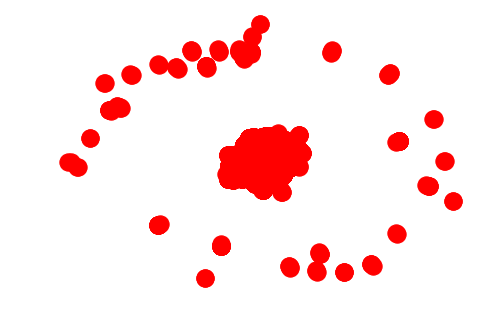

In [81]:
nx.draw(G)
plt.show()

In [83]:
nx.write_gml(G, 'followshipnetwork.gml') #saving the graph as a GML file (Graphe markup language)

The above graph represents the full interest graph for all the months. We can notice visually that there is 2 major kind of nodes in the graph, centred ones (Core) and side ones away from center (Periphery). We will try later in this analysis to confirm that using a clustering algorithm (K-Means for exmaple). Now we will plot using cytoscape the monthly interest graphs. The last graph was a general graph of the followship relation between contributors and other Github users that are not generally contributors to the Tensorflow repository, so we'll add another filter and construct monthly graphs that only contain contributors as nodes.

In [10]:
to=[]
for i in range (0,len(followship_data_frame)):
        if (followship_data_frame.loc[followship_data_frame.index==i,'To is contributor?'].get_values()[0]=='contributer'):
            to.append(followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0])

In [11]:
Lcontributors=list(dict.fromkeys(to))
len(Lcontributors)

433

In [49]:
def getMonthGraph(month):
    G=nx.Graph()
    for i in range (0,len(followship_data_frame)):
        nodeF=followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]
        nodeT=followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0]
        if (nodeF in Lcontributors and nodeT in Lcontributors and followship_data_frame.loc[followship_data_frame.index==i,'Date'].get_values()[0]==month):
            G.add_node(nodeF)            
            G.add_node(nodeT)
            edge=(nodeF,nodeT)
            G.add_edge(*edge)
    return(G)
    

In [50]:
GJan=getMonthGraph('01-2019')
GFev=getMonthGraph('02-2019')
GMar=getMonthGraph('03-2019')
GApr=getMonthGraph('04-2019')
GMay=getMonthGraph('05-2019')

In [138]:
print(len(GJan.node))
print(len(GFev.node))
print(len(GMar.node))
print(len(GApr.node))
print(len(GMay.node))

192
192
192
192
192


In [139]:
nx.write_gml(GJan, 'followshipJan.gml')
nx.write_gml(GFev, 'followshipFev.gml')
nx.write_gml(GMar, 'followshipMar.gml')
nx.write_gml(GApr, 'followshipApr.gml')
nx.write_gml(GMay, 'followshipMay.gml')

The results are as follow, I will insert images here, but you can open the files that are in the repository in your own cytoscape.

For January: 
![image info](./Images/Jan.png)

For February: 
![image info](./Images/Feb.png)

For March: 
![image info](./Images/Mar.png)

For April: 
![image info](./Images/Apr.png)

For May: 
![image info](./Images/May.png)

The visualization is a good thing, but to make this study more intresting and mathematical we should calculate some metrics that give us insights on the network we are studying. This field of study is called **SNA (Social network analysis)**, we will start by describing the topology of each network via a number of structural metrics that will eventually help us understand the relationships between the actors of each network.   

The topology analysis can be viewed from 3 major points of view: 

**1- Macro analysis: focuses on the general pattern of the network.**

**2- Relationship analysis: focuses on the connectivity of the network.**

**3- Micro analysis: focuses on the entities of the network.**

We will start by the calculation of a basic graph metric which is the: IN/OUT Degree since our graphs are directed.

In [44]:
def getDegrees(month):
    Degrees=pd.DataFrame(columns=['login','In','Out'])
    index=0
    for cont in Lcontributors:
        j=[0,0]
        for i in range (0,11):
            if (followship_data_frame.loc[followship_data_frame.index==i,'Date'].get_values()[0]==month):
                if(followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]==cont):
                    j[1]+=1
                if(followship_data_frame.loc[followship_data_frame.index==i,'To'].get_values()[0]==cont):
                    j[0]+=1
        Degrees.loc[index]=[cont,j[0],j[1]]
        index+=1
    return(Degrees)

In [45]:
Degrees=getDegrees('01-2019')

In [47]:
list(followship_data_frame['To']).count('trevor-m')

120

In [59]:
GJan.is_directed()

False

In [31]:
followship_data_frame.loc[followship_data_frame.index==i,'From'].get_values()[0]

'JaredYeDH'